## Bangladesh Weather Prediction

### Overview 🌐
This README document provides detailed information about a dataset that combines temperature 🌡️ and rainfall 🌧️ data. The temperature data is sourced from NASA's POWER Project, and the rainfall data is obtained from the Humanitarian Data Exchange (HDX) website, specifically focusing on Bangladesh rainfall data.

### The dataset is structured into a CSV file with the following columns:

**tem**: Average temperature for the month.

**Month**: The month for the data point, ranging from 1 (January) to 12 (December).

**Year**: The year of the data point.

**rain**: Total rainfall for the month.


In [63]:
# Import all necessary tools we need

# Regular Exploratory Analysis and plotting libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Model for scikit-learn
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from xgboost import XGBRegressor
from sklearn.linear_model import LinearRegression

# Model Evaluation
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.model_selection import cross_val_score


In [2]:
# load dataset
df = pd.read_csv('../../../dataset/Temp_and_rain.csv');
df


,tem,Month,Year,rain
0,16.9760,1,1901,18.53560
1,19.9026,2,1901,16.25480
2,24.3158,3,1901,70.79810
3,28.1834,4,1901,66.16160
4,27.8892,5,1901,267.21500
...,...,...,...,...
1375,28.0642,8,2015,512.12700
1376,28.1230,9,2015,353.86900
1377,26.8624,10,2015,81.59940
1378,23.1842,11,2015,4.60815


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1380 entries, 0 to 1379
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   tem     1380 non-null   float64
 1   Month   1380 non-null   int64  
 2   Year    1380 non-null   int64  
 3   rain    1380 non-null   float64
dtypes: float64(2), int64(2)
memory usage: 43.3 KB


In [4]:
df.columns

Index(['tem', 'Month', 'Year', 'rain'], dtype='object')

In [5]:
df.isna().sum()

tem      0
Month    0
Year     0
rain     0
dtype: int64

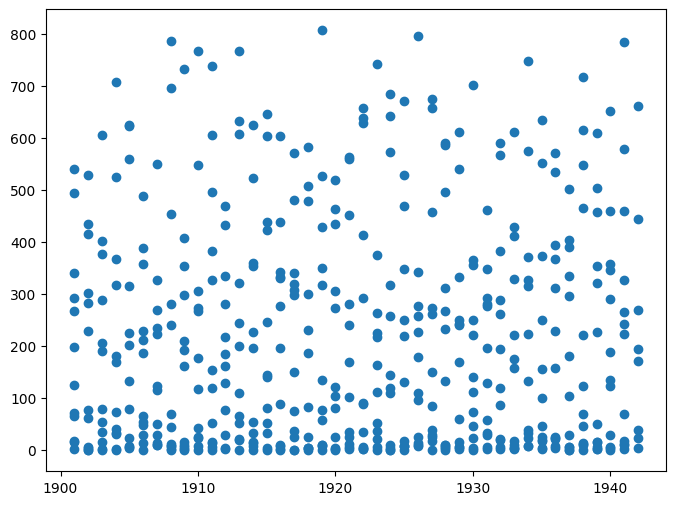

In [6]:
fig, ax = plt.subplots(figsize=(8, 6))
ax.scatter(df['Year'][:500], df['rain'][:500]);

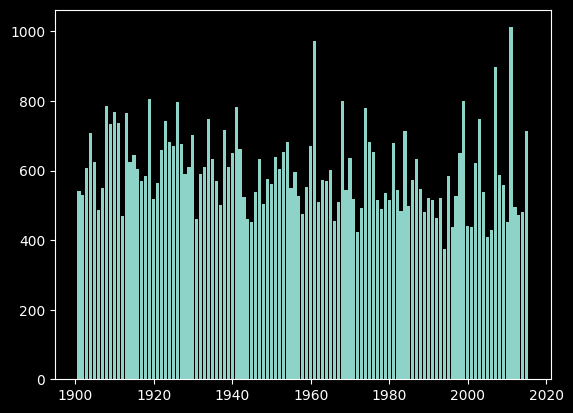

In [7]:
plt.style.use('dark_background')
plt.bar(df['Year'], df['rain']);

In [8]:
df['rain'].max()

1012.02

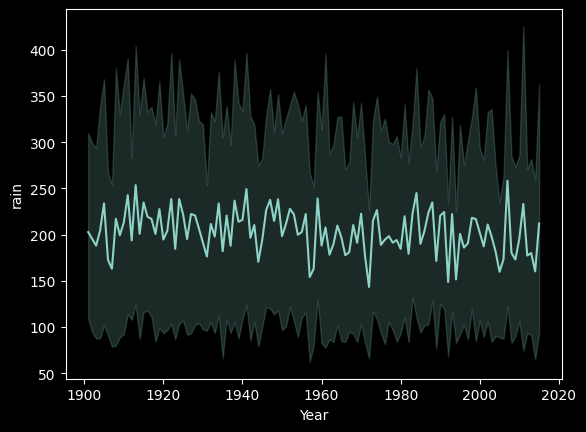

In [9]:
sns.lineplot(x='Year', y='rain', data=df);

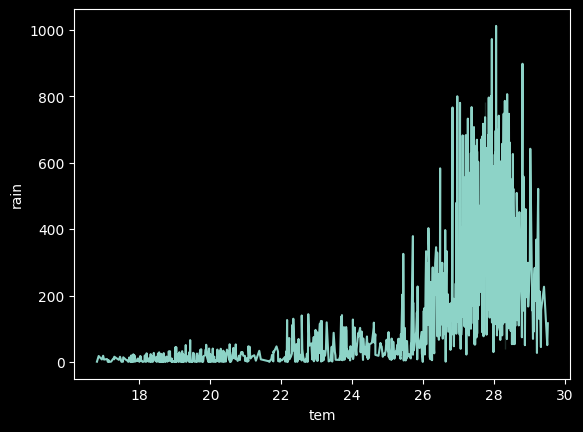

In [11]:
sns.lineplot(x='tem', y='rain', data=df);

In [12]:
df

,tem,Month,Year,rain
0,16.9760,1,1901,18.53560
1,19.9026,2,1901,16.25480
2,24.3158,3,1901,70.79810
3,28.1834,4,1901,66.16160
4,27.8892,5,1901,267.21500
...,...,...,...,...
1375,28.0642,8,2015,512.12700
1376,28.1230,9,2015,353.86900
1377,26.8624,10,2015,81.59940
1378,23.1842,11,2015,4.60815


## Model training

In [18]:
from sklearn.model_selection import train_test_split
np.random.seed(42)

# Creae X and y
X = df.drop('rain', axis=1)
y = df['rain']

# split dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [52]:
# model dict
models = {
    "Random Forest": RandomForestRegressor(),
    "KNN": KNeighborsRegressor(),
    "Xgboost": XGBRegressor(),
    "Linear Regressor": LinearRegression()
}
def model_and_score(model, X_train, X_test, y_train, y_test):
    np.random.seed(42)
    # make a dictionary to keepthe  model score
    model_score = {}
    for name, model in models.items():
        # train model
        model.fit(X_train, y_train)
        model_score[name] = model.score(X_test, y_test)

    return model_score


model_score = model_and_score(model, X_train, X_test, y_train, y_test)

In [53]:
model_score

{'Random Forest': 0.8166139671529385,
 'KNN': 0.7444843903545032,
 'Xgboost': 0.7864768003494084,
 'Linear Regressor': 0.47027206465802707}

<Axes: >

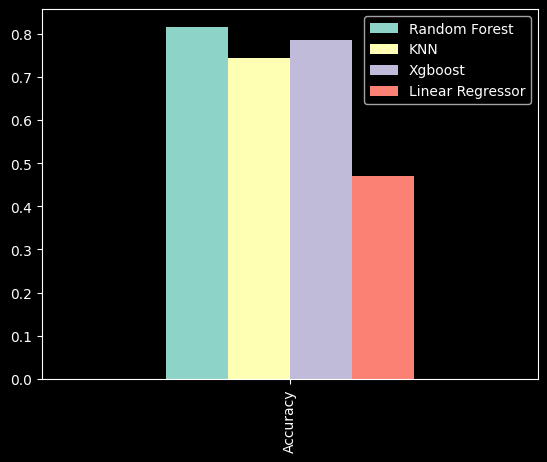

In [25]:
compare_model = pd.DataFrame(model_score, index=["Accuracy"])
compare_model.plot(kind="bar")

## Hyperparameter tuning

In [26]:
from sklearn.model_selection import RandomizedSearchCV
# Set different hyperparameter for randomforestregression
random_para = {
    "n_estimators": np.arange(100, 1000, 50),
    "max_depth": [10, 20, 30, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['sqrt', 'log2', None],
}

rs_random_reg = RandomizedSearchCV(
        estimator=RandomForestRegressor(),
        param_distributions=random_para,
        n_iter=10,
        cv=5,
        verbose=2
    )

rs_random_reg.fit(X_train, y_train)


Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] END max_depth=20, max_features=log2, min_samples_leaf=2, min_samples_split=2, n_estimators=100; total time=   0.1s
[CV] END max_depth=20, max_features=log2, min_samples_leaf=2, min_samples_split=2, n_estimators=100; total time=   0.0s
[CV] END max_depth=20, max_features=log2, min_samples_leaf=2, min_samples_split=2, n_estimators=100; total time=   0.0s
[CV] END max_depth=20, max_features=log2, min_samples_leaf=2, min_samples_split=2, n_estimators=100; total time=   0.0s
[CV] END max_depth=20, max_features=log2, min_samples_leaf=2, min_samples_split=2, n_estimators=100; total time=   0.0s
[CV] END max_depth=10, max_features=None, min_samples_leaf=2, min_samples_split=5, n_estimators=350; total time=   0.6s
[CV] END max_depth=10, max_features=None, min_samples_leaf=2, min_samples_split=5, n_estimators=350; total time=   0.6s
[CV] END max_depth=10, max_features=None, min_samples_leaf=2, min_samples_split=5, n_estimators=350

RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(),
                   param_distributions={'max_depth': [10, 20, 30, None],
                                        'max_features': ['sqrt', 'log2', None],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': array([100, 150, 200, 250, 300, 350, 400, 450, 500, 550, 600, 650, 700,
       750, 800, 850, 900, 950])},
                   verbose=2)

In [27]:
rs_random_reg.best_params_

{'n_estimators': 800,
 'min_samples_split': 10,
 'min_samples_leaf': 2,
 'max_features': None,
 'max_depth': None}

In [29]:
rs_random_reg.score(X_test, y_test)

0.8232468489791633

## Evaluation

In [62]:
y_pred = rs_random_reg.predict(X_test)

print(f"R2 Score {r2_score(y_test, y_pred)}")
print(f"Mean Absolute Error {mean_absolute_error(y_test, y_pred)}")
print(f"Mean Square Error {mean_squared_error(y_test, y_pred)}")

R2 Score 0.8232468489791633
Mean Absolute Error 53.93595900896447
Mean Square Error 7552.4386312878205


## Evalution with scoring paramerter

In [56]:
cv_acc = cross_val_score(model, X, y, cv=5, scoring="r2")

cv_acc = np.mean(cv_acc)

In [61]:
print(f"Cross Validation score for random forest regression {cv_acc*100:.2f}%")

Cross Validation score for random forest regression 81.85%


## Save and Load data

In [64]:
import pickle
with open("bangladesh_weather_regression.pkl", "wb") as file:
    pickle.dump(rs_random_reg, file)


In [65]:
# load data
with open("bangladesh_weather_regression.pkl", "rb") as file:
    pickled_model = pickle.load(file)

In [66]:
# predict
pk_y_preds = pickled_model.predict(X_test)
final_score = r2_score(y_test, pk_y_preds)
final_score

0.8232468489791633